Objective

## Stock Market Prediction And Forecasting Using Stacked LSTM

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

### Reading Dataset

In [ ]:
tg= pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [ ]:
tg.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
tg.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


### Basic Statistics of the data

In [ ]:
tg.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


### Checking for null values

In [ ]:
NAN = [(c, tg[c].isnull().mean()*100) for c in tg]
NAN = pd.DataFrame(NAN, columns = ['column_name','percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


In [ ]:
srt = tg.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
srt.reset_index(inplace=True)

In [ ]:
srt.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


### Data Visualization

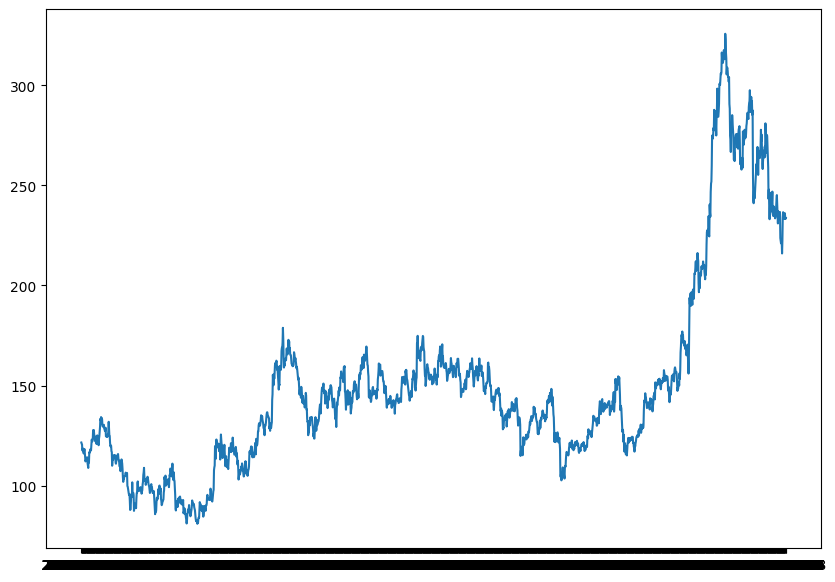

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])

In [ ]:
close_srt = srt['Close']
close_srt

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

### Feature Scaling:MinMax Scaler

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

### Splitting the dataset

In [ ]:
train_size = int(len(close_srt)*0.7)
test_size = len(close_srt) - train_size
train_data, test_data = close_srt[0:train_size,:], close_srt[train_size:len(close_srt),:1]

In [ ]:
train_data.shape

(1424, 1)

In [ ]:
test_data.shape

(611, 1)

### Convert array of values into dataset matrix

In [ ]:
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [],[]
  for i in range(len(dataset)- time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

### Reshaping the dataset

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [ ]:
print(X_train.shape) , print(y_train.shape)

(1, 100)
(1,)


(None, None)

In [ ]:
print(X_test.shape) , print(y_test.shape)

(1, 100)
(1,)


(None, None)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [ ]:
X_train

array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        [0.14971405],
        [0.15400327],
        [0.15236928],
        [0.14562908],
        [0.14338235],
        [0.14848856],
        [0.15257353],
        [0.14522059],
        [0.13521242],
        [0.12724673],
        [0.13031046],
        [0.12806373],
        [0.13459967],
        [0.12908497],
        [0.13562092],
        [0.12377451],
        [0.1190768 ],
        [0.11397059],
        [0.13112745],
        [0.12479575],
        [0.14603758],
        [0.14501634],
        [0.14726307],
        [0.15196078],
        [0.1503268 ],
        [0.14971405],
        [0.16156046],
        [0.17177288],
        [0.1693219 ],
        [0.16830065],
        [0.17238562],
        [0.19097222],
        [0.18913399],
        [0.19138072],
        [0.18382353],
        [0.17544935],
        [0.17279412],
        [0.16830065],
        [0.17034314],
        [0.17810458],
        [0.16973039],
        [0.16278595],
        [0

### Creating stacked LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [ ]:
model= Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Performance Checking

In [ ]:
model.fit(X_train,y_train,validation_split=0,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
1/1 [==============================] - 7s 7s/step - loss: 0.0157
Epoch 2/60
1/1 [==============================] - 0s 110ms/step - loss: 0.0081
Epoch 3/60
1/1 [==============================] - 0s 104ms/step - loss: 0.0029
Epoch 4/60
1/1 [==============================] - 0s 106ms/step - loss: 1.5649e-04
Epoch 5/60
1/1 [==============================] - 0s 97ms/step - loss: 9.8737e-04
Epoch 6/60
1/1 [==============================] - 0s 100ms/step - loss: 0.0026
Epoch 7/60
1/1 [==============================] - 0s 95ms/step - loss: 0.0021
Epoch 8/60
1/1 [==============================] - 0s 96ms/step - loss: 8.2137e-04
Epoch 9/60
1/1 [==============================] - 0s 108ms/step - loss: 9.2115e-05
Epoch 10/60
1/1 [==============================] - 0s 121ms/step - loss: 5.1008e-05
Epoch 11/60
1/1 [==============================] - 0s 105ms/step - loss: 3.8352e-04
Epoch 12/60
1/1 [==============================] - 0s 100ms/step - loss: 7.3592e-04
Epoch 13/60
1/1 [==========

In [ ]:
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

1/1 [==============================] - 0s 34ms/step


In [ ]:
train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)


### Calculating Performance

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

111.4099827186734

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

116.97302420622383

### Prediction for next days

In [ ]:
len(test_data)

611

In [ ]:
pred_input=test_data[511:].reshape(1,-1)
pred_input.shape

(1, 100)

In [ ]:
temp_input= list(pred_input)
temp_input= temp_input[0].tolist()

In [ ]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269